In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st
import sidetable
from scipy.stats import chi2_contingency
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### **Ana: Educación(Q4)]**

In [2]:
df_formacion=pd.read_csv('../files/df_depurado.csv', index_col=0)
print(df_formacion.shape)
df_formacion.head(2)

(16038, 14)


,age,gender,country_q3,education_q4,role_q5,experience_q6,language_q7,sector_q20,company_size_q21,anual_income_q25,continent,gender_def,role_q5_def,annual_incom€_q25
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",Asia,Man,NaN,"23,250-27,899"
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",Asia,Man,Supervising role,"55,800-65,099"


In [3]:
df_formacion_eu=pd.read_csv('../files/df_eu_depurado.csv', index_col=0)
print(df_formacion_eu.shape)
df_formacion_eu.head(2)

(3164, 14)


,age,gender,country_q3,education_q4,role_q5,experience_q6,language_q7,sector_q20,company_size_q21,anual_income_q25,continent,gender_def,role_q5_def,annual_incom€_q25
15,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,"Python, C, C++, MATLAB",Academics/Education,50-249 employees,"10,000-14,999",Europe,Man,NaN,"1,860-2,789"
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,"Python, SQL",Energy/Mining,"1000-9,999 employees","2,000-2,999",Europe,Man,NaN,"65,100-74,399"


In [4]:
df_formacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16038 entries, 0 to 25972
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                16038 non-null  object
 1   gender             16038 non-null  object
 2   country_q3         16038 non-null  object
 3   education_q4       16038 non-null  object
 4   role_q5            16038 non-null  object
 5   experience_q6      16038 non-null  object
 6   language_q7        15085 non-null  object
 7   sector_q20         16038 non-null  object
 8   company_size_q21   16038 non-null  object
 9   anual_income_q25   15195 non-null  object
 10  continent          16038 non-null  object
 11  gender_def         16038 non-null  object
 12  role_q5_def        8787 non-null   object
 13  annual_incom€_q25  15469 non-null  object
dtypes: object(14)
memory usage: 1.8+ MB


In [5]:
df_formacion_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 15 to 25970
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                3164 non-null   object
 1   gender             3164 non-null   object
 2   country_q3         3164 non-null   object
 3   education_q4       3164 non-null   object
 4   role_q5            3164 non-null   object
 5   experience_q6      3164 non-null   object
 6   language_q7        3072 non-null   object
 7   sector_q20         3164 non-null   object
 8   company_size_q21   3164 non-null   object
 9   anual_income_q25   3009 non-null   object
 10  continent          3164 non-null   object
 11  gender_def         3164 non-null   object
 12  role_q5_def        1761 non-null   object
 13  annual_incom€_q25  3042 non-null   object
dtypes: object(14)
memory usage: 370.8+ KB


In [6]:
df_formacion_eu['education_q4'].value_counts()

Master’s degree                                                      1659
Doctoral degree                                                       657
Bachelor’s degree                                                     482
Some college/university study without earning a bachelor’s degree     148
Professional doctorate                                                 74
No formal education past high school                                   73
I prefer not to answer                                                 71
Name: education_q4, dtype: int64

In [7]:
df_formacion['education_q4'].count()
#no tenemos ni nulos ni registros vacios para formación

16038

In [8]:
df_formacion['role_q5'].value_counts()

Data Scientist                  3391
Other                           2280
Software Engineer               2229
Data Analyst                    2146
Research Scientist              1452
Machine Learning Engineer       1373
Business Analyst                 911
Program/Project Manager          804
Data Engineer                    623
Product Manager                  298
Statistician                     293
DBA/Database Engineer            151
Developer Relations/Advocacy      87
Name: role_q5, dtype: int64

Nos interesan las personas trabajadoras, en nuestra encuesta hay muchos estudiantes, que están distorsionando las respuestas a nuestras preguntas, retiramos los registros que no hayan puesto el tamaño de su empresa.Para hacer los cruces de educación con esas columnas, mientras, trabajaremos con los nulos para no perder tantos datos.

In [9]:
df_def_fomacion_mund_trabajadores=df_formacion.dropna(subset= ["sector_q20"], how = "any")
print(df_def_fomacion_mund_trabajadores.shape)


(16038, 14)


In [10]:
df_def_fomacion_eu_trabajadores=df_formacion_eu.dropna(subset= ["sector_q20"], how = "any")
print(df_def_fomacion_eu_trabajadores.shape)

(3164, 14)


In [11]:
df_def_fomacion_mund_trabajadores.isnull().sum()*100/df_def_fomacion_mund_trabajadores.shape[0]

age                   0.000000
gender                0.000000
country_q3            0.000000
education_q4          0.000000
role_q5               0.000000
experience_q6         0.000000
language_q7           5.942137
sector_q20            0.000000
company_size_q21      0.000000
anual_income_q25      5.256266
continent             0.000000
gender_def            0.000000
role_q5_def          45.211373
annual_incom€_q25     3.547824
dtype: float64

In [12]:
df_def_fomacion_eu_trabajadores.isnull().sum()*100/df_def_fomacion_eu_trabajadores.shape[0]

age                   0.000000
gender                0.000000
country_q3            0.000000
education_q4          0.000000
role_q5               0.000000
experience_q6         0.000000
language_q7           2.907712
sector_q20            0.000000
company_size_q21      0.000000
anual_income_q25      4.898862
continent             0.000000
gender_def            0.000000
role_q5_def          44.342604
annual_incom€_q25     3.855879
dtype: float64

In [14]:
df_def_fomacion_eu_trabajadores['education_q4_new']=np.where(df_def_fomacion_eu_trabajadores['education_q4'].str.contains('Some college/university study without earning a bachelor’s degree', case=False,regex=True),'Non-Degree University studies',df_def_fomacion_eu_trabajadores['education_q4'])

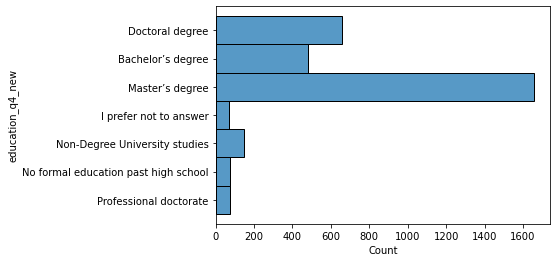

In [15]:
sns.histplot(y=df_def_fomacion_eu_trabajadores['education_q4_new'])
plt.xlabel
plt.savefig('../graphs/ana_formacion_eu.png')
plt.show()

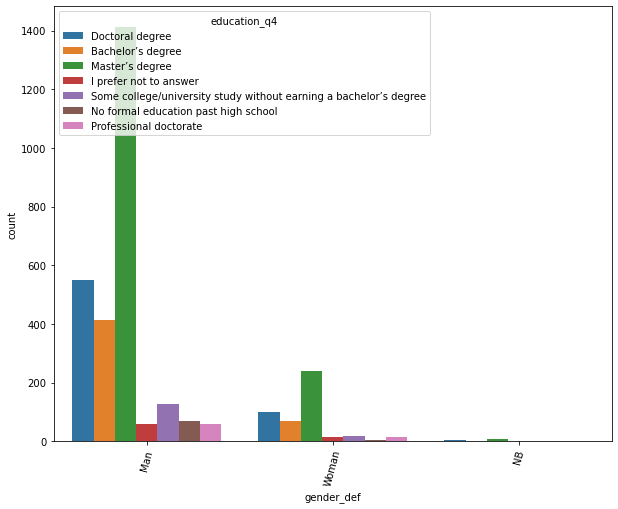

In [14]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_eu_trabajadores['gender_def'],data = df_def_fomacion_eu_trabajadores , hue='education_q4')
plt.xticks(rotation= 75)
plt.savefig('../graphs/ana_formacion_genero_eu.png')
plt.show()

### en europa vemos predominan en todos los generos master>doctorado>grado

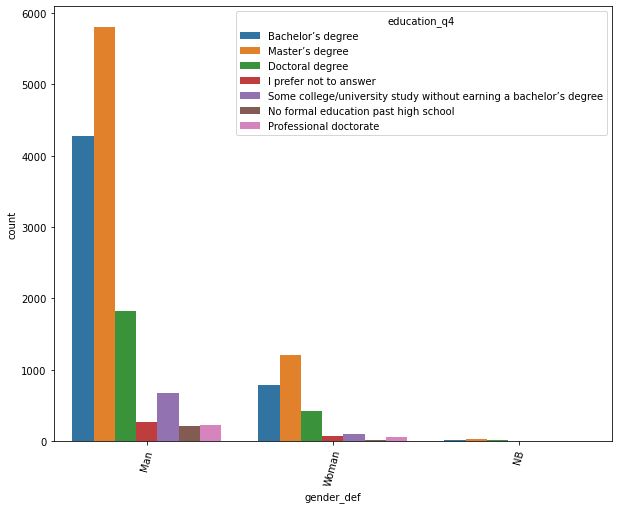

In [15]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_mund_trabajadores['gender_def'],data = df_def_fomacion_mund_trabajadores , hue='education_q4')
plt.xticks(rotation= 75)
plt.savefig('../graphs/ana_formacion_genero_world.png')
plt.show()

### a nivel global, vemos que el orden cambia, master>grado>doctorado

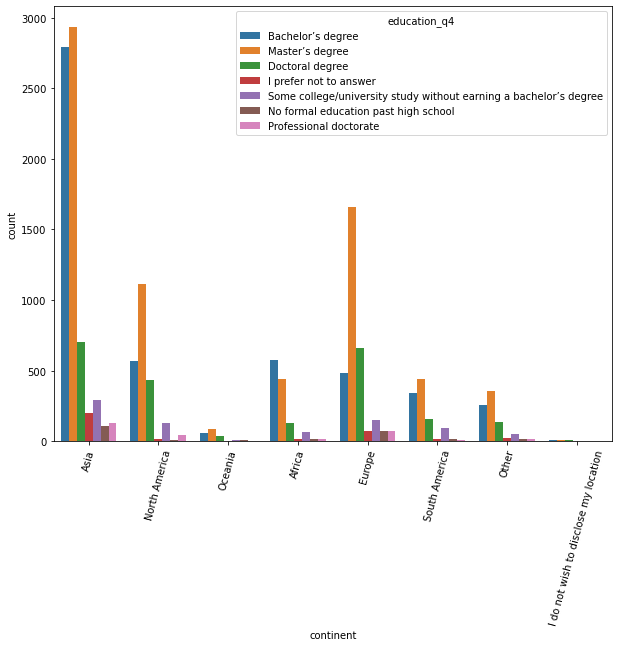

In [16]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_mund_trabajadores['continent'],data = df_def_fomacion_mund_trabajadores , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

### aqui lo vemos resumido en una gráfica, vemos como en asia sobre todo y en America del norte, que es la parte mayoritaria de la muestra, hay mas trabajadores con grado que con doctorado, y que se mantiene la tendencia de master como mayoritario.

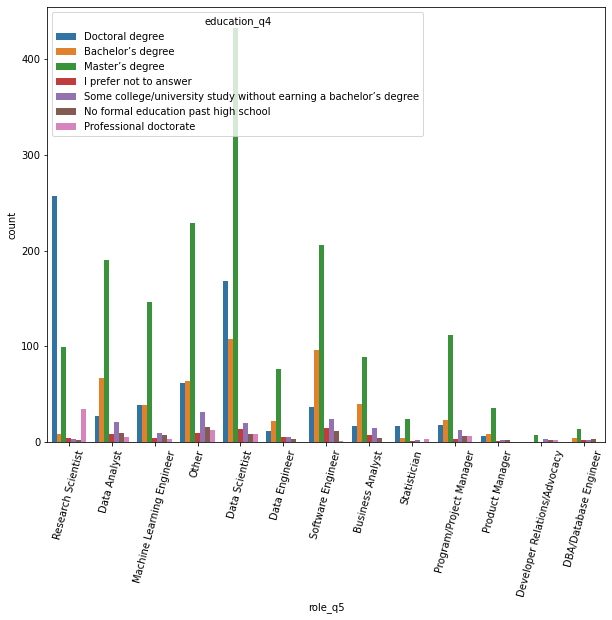

In [17]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_eu_trabajadores['role_q5'],data = df_def_fomacion_eu_trabajadores , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

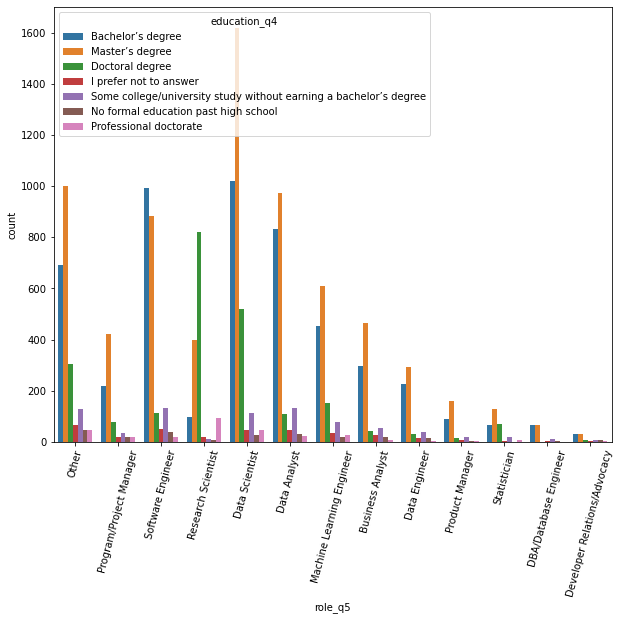

In [18]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_mund_trabajadores['role_q5'],data = df_def_fomacion_mund_trabajadores , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

#### segun roles, sigue predominando master en todos los grupos, se observa que en el grupo de investigadores y cientificos de datos, el porcentaje de doctorado es más elevado que en el resto.

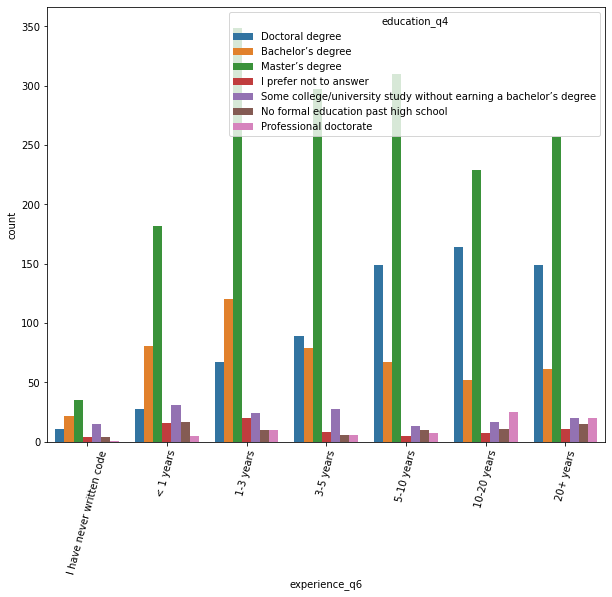

In [19]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_eu_trabajadores['experience_q6'],data = df_def_fomacion_eu_trabajadores , hue='education_q4',order=['I have never written code','< 1 years','1-3 years', '3-5 years','5-10 years','10-20 years', '20+ years'] )
plt.xticks(rotation= 75)
plt.show()

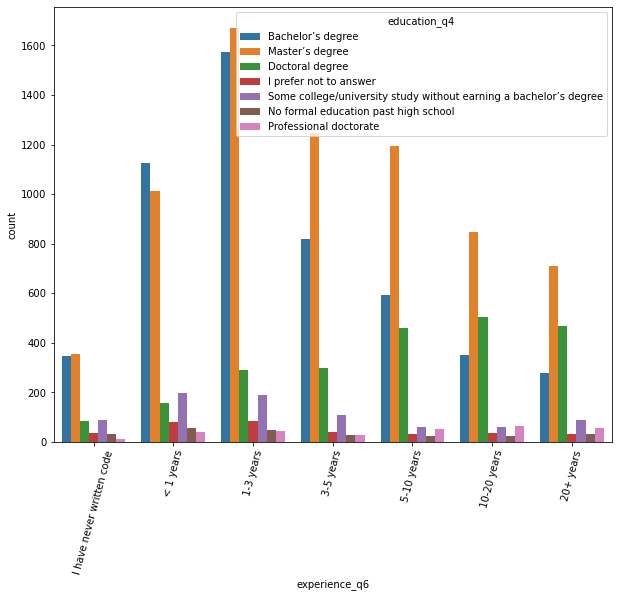

In [20]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_mund_trabajadores['experience_q6'],data = df_def_fomacion_mund_trabajadores , hue='education_q4',order=['I have never written code','< 1 years','1-3 years', '3-5 years','5-10 years','10-20 years', '20+ years'] )
plt.xticks(rotation= 75)
plt.show()

## aqui vemos bastante bien, como a menor experiencia, menor grado de estudios, comparando entre grado y doctorado.

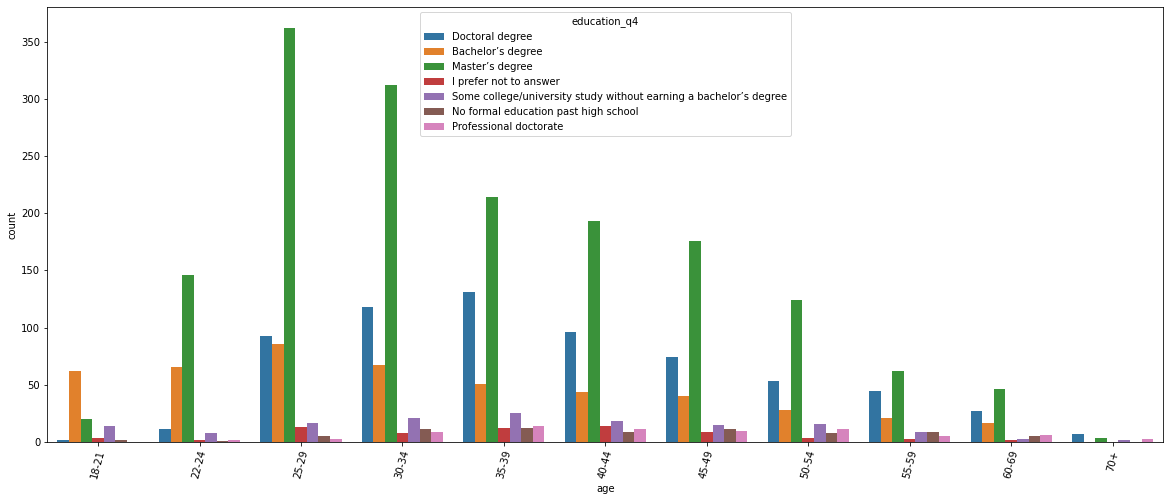

In [52]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_eu_trabajadores['age'],data = df_def_fomacion_eu_trabajadores , hue='education_q4',order=[ '18-21','22-24','25-29','30-34','35-39','40-44', '45-49', '50-54','55-59', '60-69', '70+'])
plt.xticks(rotation= 75)
plt.savefig('../graphs/ana_formacion_edad_eu.png')
plt.show()

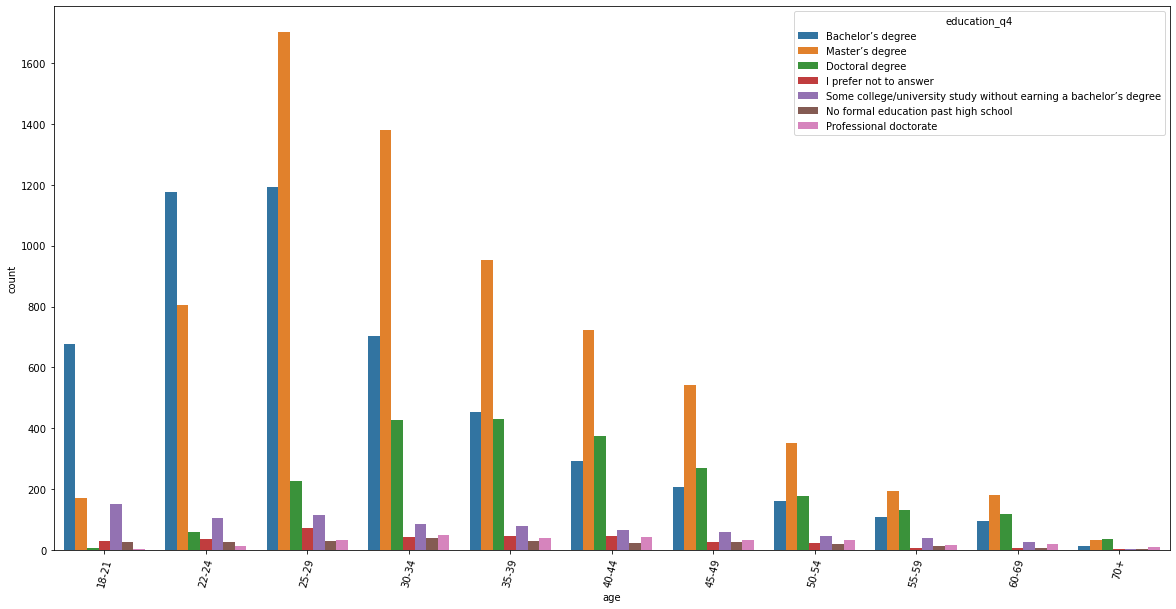

In [22]:
plt.figure(figsize =(20,10))
sns.countplot(x=df_def_fomacion_mund_trabajadores['age'],data = df_def_fomacion_mund_trabajadores , hue='education_q4',order=[ '18-21','22-24','25-29','30-34','35-39','40-44', '45-49', '50-54','55-59', '60-69', '70+'] )
plt.xticks(rotation= 75)
plt.savefig('../graphs/ana_formacion_edad_world.png')
plt.show()

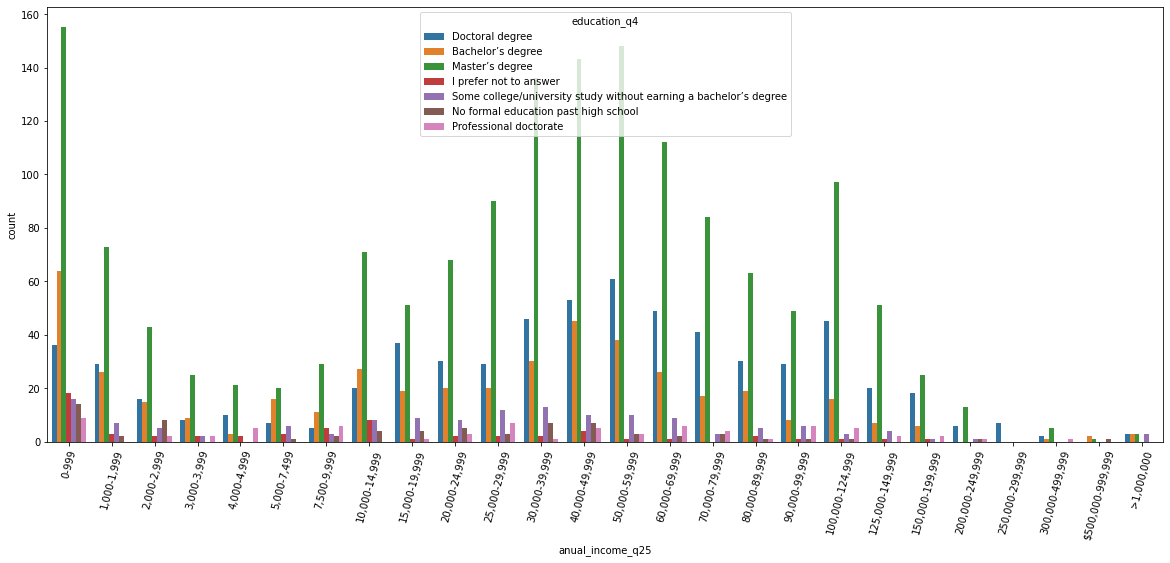

In [53]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_eu_trabajadores['anual_income_q25'],data = df_def_fomacion_eu_trabajadores , hue='education_q4', order=['0-999','1,000-1,999', '2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499', '7,500-9,999' ,'10,000-14,999','15,000-19,999','20,000-24,999',  '25,000-29,999', '30,000-39,999','40,000-49,999','50,000-59,999',  '60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999' ,'250,000-299,999',
       '300,000-499,999','$500,000-999,999','>1,000,000'])
plt.xticks(rotation= 75)
plt.show()

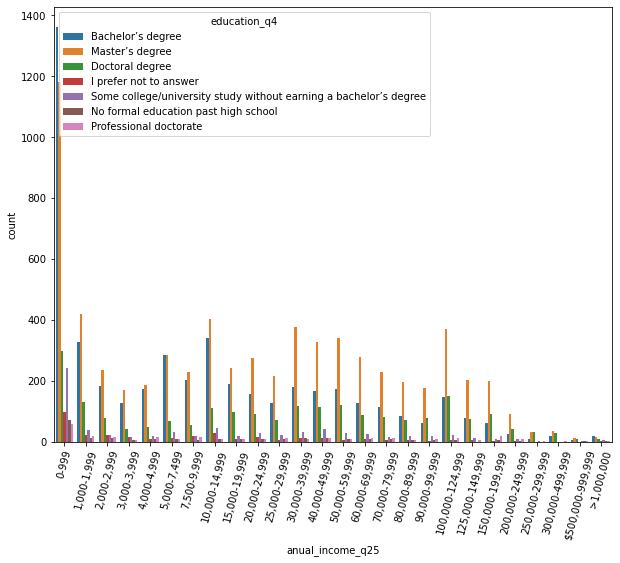

In [24]:
plt.figure(figsize =(20,8))
sns.countplot(x=df_def_fomacion_mund_trabajadores['anual_income_q25'],data = df_def_fomacion_mund_trabajadores , hue='education_q4', order=['0-999','1,000-1,999', '2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499', '7,500-9,999' ,'10,000-14,999','15,000-19,999','20,000-24,999',  '25,000-29,999', '30,000-39,999','40,000-49,999','50,000-59,999',  '60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999' ,'250,000-299,999',
       '300,000-499,999','$500,000-999,999','>1,000,000'])
plt.xticks(rotation= 75)
plt.show()

## en europa se observa una distribucion bastante clara de los salarios en funcion de master

En los countplot, vemos predominancia de los estudios de master, seguidos de los de doctorado, mas de cerca según aumentamos los años de experiencia y edad. Por roles, analistas de datos e ingenieros de software, son los unicos grupos, en los que los encuestados en activo, predomina el master seguido de un grado y no de un doctorado.

In [25]:
df_def_fomacion_eu_trabajadores.stb.freq(["education_q4", 'gender_def'])

,education_q4,gender_def,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Man,1412,44.627054,1412,44.627054
1,Doctoral degree,Man,551,17.414665,1963,62.041719
2,Bachelor’s degree,Man,414,13.084703,2377,75.126422
3,Master’s degree,Woman,238,7.522124,2615,82.648546
4,Some college/university study without earning ...,Man,128,4.045512,2743,86.694058
5,Doctoral degree,Woman,101,3.192162,2844,89.886220
6,No formal education past high school,Man,69,2.180784,2913,92.067004
7,Bachelor’s degree,Woman,68,2.149178,2981,94.216182
8,Professional doctorate,Man,58,1.833123,3039,96.049305
9,I prefer not to answer,Man,57,1.801517,3096,97.850822


In [26]:
educacion_gen_eu=pd.DataFrame(pd.crosstab(df_def_fomacion_eu_trabajadores['education_q4'],df_def_fomacion_eu_trabajadores['gender_def']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_gen_eu

gender_def,Man,NB,Woman
education_q4,,,
Bachelor’s degree,15.40,0.00,14.85
Doctoral degree,20.49,29.41,22.05
I prefer not to answer,2.12,5.88,2.84
Master’s degree,52.51,52.94,51.97
No formal education past high school,2.57,0.00,0.87
Professional doctorate,2.16,5.88,3.28
Some college/university study without earning a bachelor’s degree,4.76,5.88,4.15


In [27]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_gen_eu)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en Europa en el tipo de educacion según el género de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el género de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en Europa en el tipo de educacion según el género de las personas en activo, con una p de 0.02


In [28]:
df_def_fomacion_mund_trabajadores.stb.freq(["education_q4", 'gender_def'])

,education_q4,gender_def,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Man,5803,36.182816,5803,36.182816
1,Bachelor’s degree,Man,4282,26.699090,10085,62.881905
2,Doctoral degree,Man,1827,11.391695,11912,74.273600
3,Master’s degree,Woman,1207,7.525876,13119,81.799476
4,Bachelor’s degree,Woman,781,4.869684,13900,86.669161
5,Some college/university study without earning ...,Man,673,4.196284,14573,90.865445
6,Doctoral degree,Woman,420,2.618780,14993,93.484225
7,I prefer not to answer,Man,265,1.652326,15258,95.136551
8,Professional doctorate,Man,231,1.440329,15489,96.576880
9,No formal education past high school,Man,216,1.346801,15705,97.923681


In [29]:
educacion_gen_mund=pd.DataFrame(pd.crosstab(df_def_fomacion_mund_trabajadores['education_q4'],df_def_fomacion_mund_trabajadores['gender_def']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_gen_mund

gender_def,Man,NB,Woman
education_q4,,,
Bachelor’s degree,32.20,27.03,29.28
Doctoral degree,13.74,17.57,15.75
I prefer not to answer,1.99,4.05,2.70
Master’s degree,43.64,33.78,45.26
No formal education past high school,1.62,2.70,0.79
Professional doctorate,1.74,4.05,2.36
Some college/university study without earning a bachelor’s degree,5.06,10.81,3.86


In [30]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_gen_mund)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en Europa en el tipo de educacion según el género de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas a nivel mundial en el tipo de educacion según el género de las personas en activo, con una p de {round(chi2[1], 2)}")

No existen diferencias significativas a nivel mundial en el tipo de educacion según el género de las personas en activo, con una p de 0.63


## en europa tenemos diferencias significativas en cuanto a formacion segun género, pero no a nivel mundial, asi que voy a comprobar, si hay diferencias significativas en estudios entre contienetes

In [31]:
df_def_fomacion_mund_trabajadores.stb.freq(["education_q4", 'continent'])

,education_q4,continent,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Asia,2935,18.300287,2935,18.300287
1,Bachelor’s degree,Asia,2794,17.421125,5729,35.721412
2,Master’s degree,Europe,1659,10.344183,7388,46.065594
3,Master’s degree,North America,1115,6.952238,8503,53.017833
4,Doctoral degree,Asia,704,4.389575,9207,57.407407
5,Doctoral degree,Europe,657,4.096521,9864,61.503928
6,Bachelor’s degree,Africa,574,3.579000,10438,65.082928
7,Bachelor’s degree,North America,571,3.560294,11009,68.643222
8,Bachelor’s degree,Europe,482,3.005362,11491,71.648585
9,Master’s degree,Africa,443,2.762190,11934,74.410774


In [32]:
educacion_continent=pd.DataFrame(pd.crosstab(df_def_fomacion_mund_trabajadores['education_q4'],df_def_fomacion_mund_trabajadores['continent']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_continent

continent,Africa,Asia,Europe,I do not wish to disclose my location,North America,Oceania,Other,South America
education_q4,,,,,,,,
Bachelor’s degree,45.56,39.03,15.23,22.73,24.67,29.35,29.81,32.27
Doctoral degree,10.40,9.84,20.76,31.82,18.66,17.91,16.08,14.63
I prefer not to answer,1.43,2.77,2.24,13.64,0.65,0.00,2.58,1.22
Master’s degree,35.16,41.00,52.43,22.73,48.16,43.28,41.43,41.09
No formal education past high school,0.95,1.48,2.31,4.55,0.43,2.99,1.88,1.41
Professional doctorate,1.35,1.84,2.34,4.55,1.94,1.49,1.88,0.84
Some college/university study without earning a bachelor’s degree,5.16,4.04,4.68,0.00,5.49,4.98,6.34,8.54


In [33]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_continent)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el continente de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el continente de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el continente de las personas en activo, con una p de 0.0


In [34]:
educacion_age_eu=pd.DataFrame(pd.crosstab(df_def_fomacion_eu_trabajadores['education_q4'],df_def_fomacion_eu_trabajadores['age']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_age_eu

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Bachelor’s degree,59.62,27.97,14.85,12.27,11.11,11.43,11.94,11.48,13.64,16.04,0.00
Doctoral degree,1.92,4.66,16.06,21.61,28.54,24.94,22.09,21.72,29.22,25.47,43.75
I prefer not to answer,3.85,0.85,2.25,1.47,2.61,3.64,2.69,1.64,1.95,1.89,0.00
Master’s degree,19.23,61.86,62.52,57.14,46.62,50.13,52.54,50.82,40.26,43.40,25.00
No formal education past high school,1.92,0.42,0.86,2.01,2.61,2.34,3.28,3.28,5.84,4.72,0.00
Professional doctorate,0.00,0.85,0.52,1.65,3.05,2.86,2.99,4.51,3.25,5.66,18.75
Some college/university study without earning a bachelor’s degree,13.46,3.39,2.94,3.85,5.45,4.68,4.48,6.56,5.84,2.83,12.50


`en las siguientes filas del DataFrame, vemos como es existe una correlación negativa entre edad y nivel de estudios de personas en activo`

In [35]:
educacion_age_eu[(educacion_age_eu.index=='Master’s degree')]

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Master’s degree,19.23,61.86,62.52,57.14,46.62,50.13,52.54,50.82,40.26,43.4,25.0


In [36]:
educacion_age_eu[(educacion_age_eu.index=='Doctoral degree')]

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Doctoral degree,1.92,4.66,16.06,21.61,28.54,24.94,22.09,21.72,29.22,25.47,43.75


In [37]:
educacion_age_eu[(educacion_age_eu.index=='Bachelor’s degree')]

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Bachelor’s degree,59.62,27.97,14.85,12.27,11.11,11.43,11.94,11.48,13.64,16.04,0.0


In [38]:
educacion_age_eu[(educacion_age_eu.index=='Some college/university study without earning a bachelor’s degree')]

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Some college/university study without earning a bachelor’s degree,13.46,3.39,2.94,3.85,5.45,4.68,4.48,6.56,5.84,2.83,12.5


In [39]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_age_eu)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según la edad de las personas en activo en Europa, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de 0.0


In [40]:
educacion_age_mund=pd.DataFrame(pd.crosstab(df_def_fomacion_mund_trabajadores['education_q4'],df_def_fomacion_mund_trabajadores['age']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_age_mund

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Bachelor’s degree,63.45,52.92,35.40,25.79,22.32,18.66,17.85,19.80,21.14,20.96,12.37
Doctoral degree,0.75,2.61,6.71,15.60,21.14,23.95,23.26,21.89,25.64,26.20,37.11
I prefer not to answer,2.72,1.66,2.11,1.61,2.26,2.99,2.32,2.71,1.37,1.75,2.06
Master’s degree,15.93,36.21,50.52,50.59,46.90,45.99,46.44,43.30,37.96,39.74,32.99
No formal education past high school,2.44,1.17,0.86,1.47,1.43,1.46,2.15,2.46,2.54,1.31,2.06
Professional doctorate,0.47,0.63,0.98,1.76,2.02,2.80,2.75,4.06,3.33,4.59,9.28
Some college/university study without earning a bachelor’s degree,14.25,4.81,3.42,3.19,3.93,4.14,5.24,5.78,8.02,5.46,4.12


In [41]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_age_mund)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de 0.0


## encontramos diferencias significativas tanto a nivel europeo como mundial en el tipo de educación según la edad de las personas en activo. Comprobamos si se mantiene para la experiencia, como cabria esperar

In [42]:
educacion_experiencia_eu=pd.DataFrame(pd.crosstab(df_def_fomacion_eu_trabajadores['education_q4'],df_def_fomacion_eu_trabajadores['experience_q6']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_experiencia_eu

experience_q6,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code
education_q4,,,,,,,
Bachelor’s degree,20.00,10.30,11.44,15.40,11.94,22.50,23.91
Doctoral degree,11.17,32.48,27.95,17.35,26.56,7.78,11.96
I prefer not to answer,3.33,1.39,2.06,1.56,0.89,4.44,4.35
Master’s degree,58.17,45.35,48.22,57.89,55.26,50.56,38.04
No formal education past high school,1.67,2.18,2.81,1.17,1.78,4.72,4.35
Professional doctorate,1.67,4.95,3.75,1.17,1.25,1.39,1.09
Some college/university study without earning a bachelor’s degree,4.00,3.37,3.75,5.46,2.32,8.61,16.30


In [43]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_experiencia_eu)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de 0.0


In [44]:
educacion_experiencia_mund=pd.DataFrame(pd.crosstab(df_def_fomacion_mund_trabajadores['education_q4'],df_def_fomacion_mund_trabajadores['experience_q6']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_experiencia_mund

experience_q6,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code
education_q4,,,,,,,
Bachelor’s degree,40.34,18.63,16.67,31.96,24.49,42.25,36.41
Doctoral degree,7.47,26.80,28.22,11.57,18.98,5.93,8.60
I prefer not to answer,2.13,1.91,1.99,1.52,1.33,3.00,3.88
Master’s degree,42.90,44.90,42.66,48.64,49.52,38.00,37.04
No formal education past high school,1.18,1.33,1.87,1.01,1.04,2.03,3.36
Professional doctorate,1.15,3.29,3.43,1.09,2.20,1.46,1.36
Some college/university study without earning a bachelor’s degree,4.82,3.13,5.17,4.21,2.45,7.32,9.34


In [45]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_experiencia_mund)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de 0.0


## confirmamos las diferencias por años de experiencia

In [46]:
df_def_fomacion_eu_trabajadores.stb.freq(["education_q4", 'role_q5'])

,education_q4,role_q5,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Data Scientist,433,13.685209,433,13.685209
1,Doctoral degree,Research Scientist,257,8.122630,690,21.807838
2,Master’s degree,Other,229,7.237674,919,29.045512
3,Master’s degree,Software Engineer,206,6.510746,1125,35.556258
4,Master’s degree,Data Analyst,190,6.005057,1315,41.561315
...,...,...,...,...,...,...
77,No formal education past high school,Developer Relations/Advocacy,2,0.063211,3159,99.841972
78,I prefer not to answer,DBA/Database Engineer,2,0.063211,3161,99.905183
79,Professional doctorate,Software Engineer,1,0.031606,3162,99.936789
80,I prefer not to answer,Statistician,1,0.031606,3163,99.968394


In [47]:
educacion_puesto_eu=pd.DataFrame(pd.crosstab(df_def_fomacion_eu_trabajadores['education_q4'],df_def_fomacion_eu_trabajadores['role_q5']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_puesto_eu

role_q5,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician
education_q4,,,,,,,,,,,,,
Bachelor’s degree,23.39,16.67,20.49,18.03,14.13,0.00,15.85,15.13,14.81,12.78,1.97,24.74,7.84
Doctoral degree,9.94,0.00,8.26,9.02,22.19,0.00,15.45,14.66,11.11,10.00,63.14,9.28,33.33
I prefer not to answer,4.09,8.33,2.45,4.10,1.72,0.00,1.63,2.13,1.85,1.67,0.98,3.61,1.96
Master’s degree,52.05,54.17,58.10,62.30,57.20,50.00,59.35,54.14,64.81,62.22,24.32,53.09,47.06
No formal education past high school,2.34,12.50,2.75,2.46,1.06,14.29,2.85,3.78,3.70,3.33,0.49,2.84,0.00
Professional doctorate,0.00,0.00,1.53,0.00,1.06,14.29,1.22,2.84,0.00,3.33,8.35,0.26,5.88
Some college/university study without earning a bachelor’s degree,8.19,8.33,6.42,4.10,2.64,21.43,3.66,7.33,3.70,6.67,0.74,6.19,3.92


In [48]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_puesto_eu)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de 0.0


In [49]:
educacion_puesto_mund=pd.DataFrame(pd.crosstab(df_def_fomacion_mund_trabajadores['education_q4'],df_def_fomacion_mund_trabajadores['role_q5']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_puesto_mund

role_q5,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician
education_q4,,,,,,,,,,,,,
Bachelor’s degree,32.71,42.38,38.77,36.60,30.05,35.63,33.07,30.31,30.54,27.36,6.82,44.50,21.84
Doctoral degree,4.61,0.66,5.13,4.98,15.31,6.90,11.00,13.29,5.37,9.58,56.54,5.02,24.23
I prefer not to answer,2.85,3.31,2.10,2.57,1.42,3.45,2.40,2.81,2.01,2.24,1.38,2.33,1.37
Master’s degree,50.82,43.71,45.25,46.87,47.74,33.33,44.43,43.82,53.69,52.36,27.34,39.52,43.34
No formal education past high school,2.20,2.65,1.49,2.25,0.80,6.90,1.38,2.11,1.01,2.24,0.62,1.75,0.00
Professional doctorate,0.66,0.00,1.03,0.32,1.36,3.45,2.04,2.02,1.34,2.11,6.54,0.85,3.07
Some college/university study without earning a bachelor’s degree,6.15,7.28,6.24,6.42,3.33,10.34,5.68,5.66,6.04,4.10,0.76,6.01,6.14


In [50]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_puesto_mund)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de 0.0


### tambien encontramos diferencias significativas segun puestos

In [ ]:
df_def_fomacion2.stb.freq(["education_q4", 'anual_income_q25'])

,education_q4,anual_income_q25,count,percent,cumulative_count,cumulative_percent
0,Bachelor’s degree,$0-999,1376,8.940290,1376,8.940290
1,Master’s degree,$0-999,1200,7.796764,2576,16.737054
2,Master’s degree,"1,000-1,999",421,2.735365,2997,19.472419
3,Master’s degree,"10,000-14,999",404,2.624911,3401,22.097330
4,Master’s degree,"100,000-124,999",380,2.468975,3781,24.566305
...,...,...,...,...,...,...
172,No formal education past high school,">$1,000,000",1,0.006497,15387,99.974011
173,No formal education past high school,"$500,000-999,999",1,0.006497,15388,99.980508
174,I prefer not to answer,"250,000-299,999",1,0.006497,15389,99.987005
175,I prefer not to answer,"200,000-249,999",1,0.006497,15390,99.993503


In [ ]:
educacion_sueldo=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['anual_income_q25']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_sueldo

anual_income_q25,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999",...,"4,000-4,999","40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000"
education_q4,,,,,,,,,,,,,,,,,,,,,
Bachelor’s degree,40.84,18.75,33.85,36.21,20.14,20.58,33.33,16.33,32.17,26.58,...,37.94,23.98,40.77,25.25,23.23,37.50,24.57,21.74,17.71,34.48
Doctoral degree,9.14,25.00,13.31,11.68,20.97,20.05,16.75,23.72,13.39,15.67,...,10.53,16.57,9.87,17.65,16.15,9.96,17.46,18.67,21.71,15.52
I prefer not to answer,3.18,3.12,2.17,3.05,0.97,1.32,1.57,0.51,4.17,2.39,...,1.97,1.74,1.72,0.86,1.27,3.08,1.29,1.53,0.57,5.17
Master’s degree,35.62,37.50,43.45,42.53,52.41,54.09,42.23,51.53,41.74,47.36,...,41.23,47.97,41.20,49.35,50.82,41.85,49.35,50.90,51.14,29.31
No formal education past high school,2.17,3.12,1.34,0.84,0.69,0.00,1.40,1.02,2.26,1.53,...,1.54,1.89,1.00,1.43,1.63,1.09,1.51,1.02,1.43,1.72
Professional doctorate,1.72,6.25,1.86,0.84,1.93,1.06,1.22,4.34,2.43,1.53,...,3.07,1.89,1.14,1.43,2.18,2.90,2.37,1.28,2.57,3.45
Some college/university study without earning a bachelor’s degree,7.33,6.25,4.02,4.84,2.90,2.90,3.49,2.55,3.83,4.94,...,3.73,5.96,4.29,4.02,4.72,3.62,3.45,4.86,4.86,10.34


In [ ]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_sueldo)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el sueldo de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el sueldo de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el sueldo de las personas en activo, con una p de 0.0


In [ ]:
df_def_fomacion2.stb.freq(["education_q4", 'company_size_q21'])

,education_q4,company_size_q21,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,0-49 employees,1988,12.233093,1988,12.233093
1,Bachelor’s degree,0-49 employees,1822,11.211618,3810,23.444711
2,Master’s degree,"10,000 or more employees",1683,10.356286,5493,33.800997
3,Master’s degree,"1000-9,999 employees",1389,8.547166,6882,42.348163
4,Bachelor’s degree,"10,000 or more employees",1132,6.965725,8014,49.313888
5,Master’s degree,50-249 employees,1120,6.891884,9134,56.205772
6,Master’s degree,250-999 employees,956,5.882715,10090,62.088487
7,Bachelor’s degree,"1000-9,999 employees",823,5.064304,10913,67.152791
8,Bachelor’s degree,50-249 employees,774,4.762784,11687,71.915574
9,Doctoral degree,"1000-9,999 employees",574,3.532090,12261,75.447665


In [ ]:
educacion_tamaño=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['company_size_q21']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_tamaño

company_size_q21,0-49 employees,"10,000 or more employees","1000-9,999 employees",250-999 employees,50-249 employees
education_q4,,,,,
Bachelor’s degree,36.04,33.14,26.90,26.60,30.15
Doctoral degree,11.18,10.92,18.76,18.76,14.73
I prefer not to answer,2.63,1.64,2.09,2.23,2.38
Master’s degree,39.33,49.27,45.41,44.38,43.63
No formal education past high school,2.26,0.82,1.41,1.11,1.29
Professional doctorate,1.54,1.46,2.06,2.60,2.10
Some college/university study without earning a bachelor’s degree,7.02,2.75,3.37,4.32,5.73


In [ ]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_tamaño)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion personas en activo según el tamaño de la empresa, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion de las personas en activo según el tamaño de la empresa, con una p de {round(chi2[1], 2)}")

No existen diferencias significativas en el tipo de educacion de las personas en activo según el tamaño de la empresa, con una p de 0.99


In [ ]:
df_def_fomacion['education_q4'].value_counts()*100/df_def_fomacion.shape[0]

Master’s degree                                                      39.009741
Bachelor’s degree                                                    38.143457
Doctoral degree                                                      10.761175
Some college/university study without earning a bachelor’s degree     6.680014
I prefer not to answer                                                2.414045
No formal education past high school                                  1.605513
Professional doctorate                                                1.386055
Name: education_q4, dtype: float64

In [ ]:
df_def_fomacion['education_q4'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: education_q4, dtype: int64

In [ ]:
df_def_fomacion2['education_q4'].value_counts()*100/df_def_fomacion2.shape[0]

Master’s degree                                                      43.840735
Bachelor’s degree                                                    31.607963
Doctoral degree                                                      14.082695
Some college/university study without earning a bachelor’s degree     4.869832
I prefer not to answer                                                2.248086
Professional doctorate                                                1.849923
No formal education past high school                                  1.500766
Name: education_q4, dtype: float64

In [ ]:
df_def_fomacion2['education_q4'].value_counts()

Master’s degree                                                      7157
Bachelor’s degree                                                    5160
Doctoral degree                                                      2299
Some college/university study without earning a bachelor’s degree     795
I prefer not to answer                                                367
Professional doctorate                                                302
No formal education past high school                                  245
Name: education_q4, dtype: int64

Tenemos todos los datos con diferencias significativas excepto en la comparación por géneros y tamaño de empresa. La tendencia general es que a mayor antiguedad y edad, mayor grado de titulación, excepto en las regiones de sudafrica y estados unidos, que detras de las titulaciones de máster, viene en frecuencia el grado antes que el doctorado en la distribución por continentes.También se observan diferencias en cuanto al puesto, pero en general la tendencia es la misma, sigue predominando la titulación de máster.
El unico grupo que se mantiene en numero en activo es el de doctorado, presentando casi los mismos valores en la muestra general y en la muestra filtrada con trabajo.


En general, a mayor edad, mayor formacion, los doctorados, van bajando la proporcion con la edad, a la vez que va subiendo la licenciatura casi. El grado de master, mas o menos se mantiene, an los activos.

1-Vemos la brecha nada más empezar.
2-identificamos que no hay diferencias en slarios?, formacion?, puestos?
- interesante nicho de  posible igualdad (la mayoria d ela muestra viene de asia, regiones muy desequilibradas, lo hace más interesante)
3- lenguaje más usado, Phyton. No se imparte dentro de la educación formal.
4-predomina formacion de máster, lógico, cada vea mas, a medida que aumenta oferta de empleo, va subiendo grado universitario, con otros estudios, sigue siendo necesario formarse en lenguajes que son 'extras'. Pero es más accesible, y no se requiere tanta titulación para ejercer. (a mayor experiencia y edad, mayor formacion, siempre hablando de trabajadores, se va invirtiendo, va subiendo la gente joven con menos formacion)
5-Vemos gran oportunidad para la mujer, de incluirse en el mercado laboral tech, sin necesidad de muchos estudios extras, aprovechando el aumento de demanda de profesionales, y que aparentemente, no hay tanta discriminacion por géneros a la hora de trabajar.
APUNTAMOS, PARTIMOS SIEMPRE DE n PEQUEÑA PARA NO VARONES, PERO CON FRECUENCIAS RELATIVAS O PORCENTAJES, INTUIMOS EL POSIBLE CRECIMIENTO EN IGUALDAD A NIVEL LABORAL.